# Project 2: Part 2
ST 590  
Summer 2022  
By Claudia Donahue and Collin Knezevich  

Use the sqlite database called northwind.sqlite. This database originally
comes from https://github.com/jpwhite3/northwind-SQLite3 but has been modified.
Your task is to write up a report about the employees. That is, you want to understand how much they sell,what products they are able to sell, how they’ve done across years, how they do in different regions, etc.  

You’ll want to study the database tables a bit to get an idea about the things you could investigate.  

You should provide summary statistics and graphs with corresponding interpretation. In the end, for each employee you should describe their main strength and something they can improve upon (backed up by your summary stats and graphs of course). Feel free to use SQL through pandas here to obtain the tables. You can do the joins, summaries, etc. through pandas if you’d like.

We reviewed the database and narrowed down a few things we wanted to investigate:  
- the value of sales for each employee  
- whether certain employees were more likely to have return customers  
- whether certain employees had higher revenue per sale  

First we connected to the database using the `sqlite3` package. 

In [1]:
import sqlite3

con = sqlite3.connect("northwind.sqlite")

Using `Pandas` dataframes, we started to investigate the contents of the database. First we grabbed a list of the tables present in the database. We also referenced a visualization of the database.  

In [2]:
# get a list of the tables in the db to make sure we have them right
import pandas as pd

tabs = pd.read_sql_query('SELECT name from sqlite_master where type= "table";', con) 
tabs

,name
0,Categories
1,sqlite_sequence
2,CustomerCustomerDemo
3,CustomerDemographics
4,Customers
5,Employees
6,EmployeeTerritories
7,Order Details
8,Orders
9,Products


In [3]:
employees = pd.read_sql_query('SELECT * FROM Employees;', con) 
employees

,EmployeeID,LastName,FirstName,Title,TitleOfCourtesy,BirthDate,HireDate,Address,City,Region,PostalCode,Country,HomePhone,Extension,Photo,Notes,ReportsTo,PhotoPath
0,1,Davolio,Nancy,Sales Representative,Ms.,1948-12-08,1992-05-01,507 - 20th Ave. E.Apt. 2A,Seattle,WA,98122,USA,(206) 555-9857,5467,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Education includes a BA in psychology from Col...,2.0,http://accweb/emmployees/davolio.bmp
1,2,Fuller,Andrew,"Vice President, Sales",Dr.,1952-02-19,1992-08-14,908 W. Capital Way,Tacoma,WA,98401,USA,(206) 555-9482,3457,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Andrew received his BTS commercial in 1974 and...,NaN,http://accweb/emmployees/fuller.bmp
2,3,Leverling,Janet,Sales Representative,Ms.,1963-08-30,1992-04-01,722 Moss Bay Blvd.,Kirkland,WA,98033,USA,(206) 555-3412,3355,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Janet has a BS degree in chemistry from Boston...,2.0,http://accweb/emmployees/leverling.bmp
3,4,Peacock,Margaret,Sales Representative,Mrs.,1937-09-19,1993-05-03,4110 Old Redmond Rd.,Redmond,WA,98052,USA,(206) 555-8122,5176,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Margaret holds a BA in English literature from...,2.0,http://accweb/emmployees/peacock.bmp
4,5,Buchanan,Steven,Sales Manager,Mr.,1955-03-04,1993-10-17,14 Garrett Hill,London,None,SW1 8JR,UK,(71) 555-4848,3453,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Steven Buchanan graduated from St. Andrews Uni...,2.0,http://accweb/emmployees/buchanan.bmp
5,6,Suyama,Michael,Sales Representative,Mr.,1963-07-02,1993-10-17,Coventry House\nMiner Rd.,London,None,EC2 7JR,UK,(71) 555-7773,428,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Michael is a graduate of Sussex University (MA...,5.0,http://accweb/emmployees/davolio.bmp
6,7,King,Robert,Sales Representative,Mr.,1960-05-29,1994-01-02,Edgeham Hollow\nWinchester Way,London,None,RG1 9SP,UK,(71) 555-5598,465,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Robert King served in the Peace Corps and trav...,5.0,http://accweb/emmployees/davolio.bmp
7,8,Callahan,Laura,Inside Sales Coordinator,Ms.,1958-01-09,1994-03-05,4726 - 11th Ave. N.E.,Seattle,WA,98105,USA,(206) 555-1189,2344,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Laura received a BA in psychology from the Uni...,2.0,http://accweb/emmployees/davolio.bmp
8,9,Dodsworth,Anne,Sales Representative,Ms.,1966-01-27,1994-11-15,7 Houndstooth Rd.,London,None,WG2 7LT,UK,(71) 555-4444,452,b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x02\x00...,Anne has a BA degree in English from St. Lawre...,5.0,http://accweb/emmployees/davolio.bmp


There are nine employees in the database. They include a Vice President of Sales, a Sales Manager, an Inside Sales Coordinator, and six Sales Representatives. They are located in either London or around Seattle. 

In [9]:
# I am not sure whether there is more data in this column
# Looks like it just trails off
employees['Notes']

0    Education includes a BA in psychology from Col...
1    Andrew received his BTS commercial in 1974 and...
2    Janet has a BS degree in chemistry from Boston...
3    Margaret holds a BA in English literature from...
4    Steven Buchanan graduated from St. Andrews Uni...
5    Michael is a graduate of Sussex University (MA...
6    Robert King served in the Peace Corps and trav...
7    Laura received a BA in psychology from the Uni...
8    Anne has a BA degree in English from St. Lawre...
Name: Notes, dtype: object

In [4]:
terr = pd.read_sql_query('SELECT * FROM Territories;', con) 
terr

,TerritoryID,TerritoryDescription,RegionID
0,01581,Westboro ...,1
1,01730,Bedford ...,1
2,01833,Georgetow ...,1
3,02116,Boston ...,1
4,02139,Cambridge ...,1
5,02184,Braintree ...,1
6,02903,Providence ...,1
7,03049,Hollis ...,3
8,03801,Portsmouth ...,3
9,06897,Wilton ...,1


In [5]:
empTerr = pd.read_sql_query('SELECT * FROM EmployeeTerritories;', con) 
empTerr

,EmployeeID,TerritoryID
0,1,06897
1,1,19713
2,2,01581
3,2,01730
4,2,01833
5,2,02116
6,2,02139
7,2,02184
8,2,40222
9,3,30346


In [6]:
# The visualization of the db says 'Region' but it's 'Regions', turns out
region = pd.read_sql_query('SELECT * FROM Regions;', con) 
region

,RegionID,RegionDescription
0,1,Eastern ...
1,2,Westerns ...
2,3,Northern ...
3,4,Southern ...


In [7]:
orders = pd.read_sql_query('SELECT * FROM Orders;', con) 

# Change ShipVia to a string data type
orders = orders.astype({"ShipVia": str}, errors='raise') 

orders

,OrderID,CustomerID,EmployeeID,OrderDate,RequiredDate,ShippedDate,ShipVia,Freight,ShipName,ShipAddress,ShipCity,ShipRegion,ShipPostalCode,ShipCountry
0,10248,VINET,5,1996-07-04 00:00:00.000,1996-08-01 00:00:00.000,1996-07-16 00:00:00.000,3,32.38,Vins et alcools Chevalier,59 rue de l-Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05 00:00:00.000,1996-08-16 00:00:00.000,1996-07-10 00:00:00.000,1,11.61,Toms SpezialitÃ¤ten,Luisenstr. 48,MÃ¼nster,None,44087,Germany
2,10250,HANAR,4,1996-07-08 00:00:00.000,1996-08-05 00:00:00.000,1996-07-12 00:00:00.000,2,65.83,Hanari Carnes,"Rua do PaÃ§o, 67",Rio de Janeiro,RJ,05454-876,Brazil
3,10251,VICTE,3,1996-07-08 00:00:00.000,1996-08-05 00:00:00.000,1996-07-15 00:00:00.000,1,41.34,Victuailles en stock,"2, rue du Commerce",Lyon,None,69004,France
4,10252,SUPRD,4,1996-07-09 00:00:00.000,1996-08-06 00:00:00.000,1996-07-11 00:00:00.000,2,51.30,SuprÃªmes dÃ©lices,"Boulevard Tirou, 255",Charleroi,None,B-6000,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825,11073,PERIC,2,1998-05-05 00:00:00.000,1998-06-02 00:00:00.000,None,2,24.95,Pericles Comidas clÃ¡sicas,Calle Dr. Jorge Cash 321,MÃ©xico D.F.,None,5033,Mexico
826,11074,SIMOB,7,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,None,2,18.44,Simons bistro,VinbÃ¦ltet 34,Kobenhavn,None,1734,Denmark
827,11075,RICSU,8,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,None,2,6.19,Richter Supermarkt,Starenweg 5,GenÃ¨ve,None,1204,Switzerland
828,11076,BONAP,4,1998-05-06 00:00:00.000,1998-06-03 00:00:00.000,None,2,38.28,Bon app-,"12, rue des Bouchers",Marseille,None,13008,France


In the orders table, we can note the timeframe of the sales was from mid 1996 to mid 1998. We can group by employee over those two years to get an idea of how many sales each employee made. 

In [8]:
# get a count of the number of orders (each orderID is a single order)
ordersPer = orders.groupby('EmployeeID').count().sort_values(by=['OrderID'], ascending=False)

# rename the column
ordersPer['countOrders'] = ordersPer['OrderID'] 

# save the object
ordersPer = ordersPer[['countOrders']]

ordersPer

,countOrders
EmployeeID,
4,156
3,127
1,123
8,104
2,96
7,72
6,67
9,43
5,42


We noticed there was no column annotating the value of each order, so we had to keep searching to find a way to compare sales. We thought that the total value of sales per employee would be more interesting than the quantity of sales. We found that price information in the Order Details table: 

In [9]:
orderDetails = pd.read_sql_query('SELECT * FROM "Order Details";', con) 

# change ProductID to a string data type
orderDetails = orderDetails.astype({"ProductID": str}, errors='raise') 

# rename the discount column
#orderDetails['DiscountPct'] = orderDetails['Discount']
orderDetails.rename(columns = {'Discount':'DiscountPct'}, inplace = True)

# calculate the revenue for each row
orderDetails['Revenue'] = ((orderDetails["UnitPrice"] * orderDetails["Quantity"]) * (1 - orderDetails["DiscountPct"])).round(2)

# calculate the dollar amount of discount given
orderDetails['DiscountAmt'] = ((orderDetails["UnitPrice"] * orderDetails["Quantity"]) * orderDetails["DiscountPct"]).round(2)

orderDetails

,OrderID,ProductID,UnitPrice,Quantity,DiscountPct,Revenue,DiscountAmt
0,10248,11,14.00,12,0.00,168.0,0.0
1,10248,42,9.80,10,0.00,98.0,0.0
2,10248,72,34.80,5,0.00,174.0,0.0
3,10249,14,18.60,9,0.00,167.4,0.0
4,10249,51,42.40,40,0.00,1696.0,0.0
...,...,...,...,...,...,...,...
2150,11077,64,33.25,2,0.03,64.5,2.0
2151,11077,66,17.00,1,0.00,17.0,0.0
2152,11077,73,15.00,2,0.01,29.7,0.3
2153,11077,75,7.75,4,0.00,31.0,0.0


So we were able to merge the Orders table with the Order Details table and add up the total revenue per employee over the time period considered. 

In [10]:
# merge
orders1 = orders.merge(orderDetails, on=['OrderID'])

# change OrderID to a string data type
orders1 = orders1.astype({"OrderID": str}, errors='raise') 

# Rank employees by total revenue
salesPer = orders1.groupby('EmployeeID').sum().sort_values(by=['Revenue'], ascending=False)
salesPer = salesPer.drop(columns = 'DiscountPct', axis = 1)
salesPer

,Freight,UnitPrice,Quantity,Revenue,DiscountAmt
EmployeeID,,,,,
4,37261.55,11187.29,9798,232890.87,17296.58
3,35783.62,8748.42,7852,202812.82,10238.47
1,28118.25,8732.44,7812,192107.59,10036.12
2,25924.53,6913.41,6055,166537.76,11211.50
8,23304.42,6239.25,5913,126862.27,6438.76
7,21667.67,4717.51,4654,124568.22,16727.77
9,10215.69,3380.20,2670,77308.06,5655.94
6,11123.09,3834.96,3527,73913.14,4284.97
5,13907.28,2747.43,3036,68792.29,6775.46


The range of revenue per employee was pretty big. From $68,792 (assuming we are working with US dollars) up to 232,891.  

One interesting aspect of this chart is the use of discounts by different employees. We wanted to explore that further.  
We also were interested in the revenue per sale for each employee. 

In [11]:
# merge salesPer table with orders per employee
salesPer = salesPer.merge(ordersPer, on=['EmployeeID'])

# change OrderID to a string data type
salesPer = salesPer.astype({"countOrders": float}, errors='raise') 

# create Revenue per Order column
salesPer["revPerOrder"] = (salesPer["Revenue"] / salesPer["countOrders"]).round(2)

salesPer

,Freight,UnitPrice,Quantity,Revenue,DiscountAmt,countOrders,revPerOrder
EmployeeID,,,,,,,
4,37261.55,11187.29,9798,232890.87,17296.58,156.0,1492.89
3,35783.62,8748.42,7852,202812.82,10238.47,127.0,1596.95
1,28118.25,8732.44,7812,192107.59,10036.12,123.0,1561.85
2,25924.53,6913.41,6055,166537.76,11211.50,96.0,1734.77
8,23304.42,6239.25,5913,126862.27,6438.76,104.0,1219.83
7,21667.67,4717.51,4654,124568.22,16727.77,72.0,1730.11
9,10215.69,3380.20,2670,77308.06,5655.94,43.0,1797.86
6,11123.09,3834.96,3527,73913.14,4284.97,67.0,1103.18
5,13907.28,2747.43,3036,68792.29,6775.46,42.0,1637.91


Here we see that Employee 4, who has the largest total revenue, actually is not leading in Revenue per Order. 

Similarly, we can analyze how the employees have performed across years. We will have to extract the year from the OrderDate variable, and group by year as well as EmployeeID. 

In [28]:
# find year, add to data frame 
for i in range(0, len(orders)): 
    dateString = str(orders.loc[i, "OrderDate"])
    yr = dateString[0:4] 
    orders.loc[i, "Year"] = yr

In [51]:
# count orders 
ordersPerYear = orders.groupby(['EmployeeID', 'Year']).count()["OrderID"]
ordersPerYear = pd.DataFrame(ordersPerYear) 
# rename column 
ordersPerYear["countOrders"] = ordersPerYear["OrderID"] 
ordersPerYear = ordersPerYear["countOrders"]
ordersPerYear = pd.DataFrame(ordersPerYear) 

We can now add total revenue per year, and revenue per order by year for each employee. 

In [63]:
# getting total revenue by year per employee 
orders2 = orders.merge(orderDetails, on = ["OrderID"]) 

salesPerYear = orders2.groupby(["EmployeeID", "Year"]).sum()
salesPerYear = salesPerYear.iloc[:, [1, 2, 3, 5, 6]]

# merge with order counts info 
salesPerYear = salesPerYear.merge(ordersPerYear, on = ["EmployeeID", "Year"])

# calculate revenue per order 
salesPerYear["revPerOrder"] = (salesPerYear["Revenue"]/salesPerYear["countOrders"]).round(2)
salesPerYear

Freight  UnitPrice  Quantity    Revenue  DiscountAmt  \
EmployeeID Year                                                          
1          1996   5578.78    1691.40      1620   35764.51      3024.49   
           1997  16490.13    3957.08      3877   93148.10      4385.49   
           1998   6049.34    3083.96      2315   63194.98      2626.14   
2          1996   2585.52     822.20      1085   21757.06      1077.64   
           1997  13428.55    3195.24      2604   70444.14      4514.46   
           1998   9910.46    2895.97      2366   74336.56      5619.40   
3          1996   2483.58     812.60       940   18223.96      1007.84   
           1997  24108.09    4568.01      4436  108026.13      3762.47   
           1998   9191.95    3367.81      2476   76562.73      5468.16   
4          1996   6968.06    2340.40      2212   49945.12      3169.68   
           1997  21571.62    6074.42      5273  128809.81     10667.89   
           1998   8721.87    2772.47      2313   54135.94      3459.01   
5          1996   4836.31     701.70       778   18383.92      3581.28   
           1997   4003.83    1136.99      1471   30716.48      1878.57   
           1998   5067.14     908.74       787   19691.89      1315.61   
6          1996   2431.01     778.30       963   16642.60      1088.50   
           1997   6065.90    2148.73      1738   43126.38      2865.63   
           1998   2626.18     907.93       826   14144.16       330.84   
7          1996   1587.75     639.10       485   15232.16      2872.64   
           1997  10138.15    2430.86      2292   60471.19      6217.95   
           1998   9941.77    1647.55      1877   48864.87      7637.18   
8          1996   3313.44    1352.30       923   22240.12       921.28   
           1997   8011.07    2683.46      2843   56032.61      3743.91   
           1998  11979.91    2203.49      2147   48589.54      1773.57   
9          1996   2287.08     272.20       575    9894.52      1471.18   
           1997   2974.73    1420.29       955   26310.39      3267.16   
           1998   4953.88    1687.71      1140   41103.15       917.60   

                 countOrders  revPerOrder  
EmployeeID Year                            
1          1996           26      1375.56  
           1997           55      1693.60  
           1998           42      1504.64  
2          1996           16      1359.82  
           1997           41      1718.15  
           1998           39      1906.07  
3          1996           18      1012.44  
           1997           71      1521.49  
           1998           38      2014.81  
4          1996           31      1611.13  
           1997           81      1590.24  
           1998           44      1230.36  
5          1996           11      1671.27  
           1997           18      1706.47  
           1998           13      1514.76  
6          1996           15      1109.51  
           1997           33      1306.86  
           1998           19       744.43  
7          1996           11      1384.74  
           1997           36      1679.76  
           1998           25      1954.59  
8          1996           19      1170.53  
           1997           54      1037.64  
           1998           31      1567.40  
9          1996            5      1978.90  
           1997           19      1384.76  
           1998           19      2163.32

It appears that, across the board, revenue per order was lower in 1996 for all employees than in other years. Most employees saw a decrease in revenue per order from 1997 to 1998, but others saw an increase. Being able to continue to increase their revenue per order is a strength for those employees such as employee 3. 

Let's create a way to compare an employee's revenue per order for a certain year against the overall revenue per order for all employees. We will calculate the revenue per order for a given year, and subtract that from each employee's revenue per order for that year. (Thus, a positive value will indicate an employee had a better revenue per order than the overall revenue per order, and vice versa). 

In [54]:
# count orders
ordersPerYear2 = orders.groupby("Year").count()["OrderID"] 
ordersPerYear2 = pd.DataFrame(ordersPerYear2) 
# rename column 
ordersPerYear2["countOrders"] = ordersPerYear2["OrderID"] 
ordersPerYear2 = ordersPerYear2["countOrders"] 
ordersPerYear2 = pd.DataFrame(ordersPerYear2)

In [81]:
salesPerYear2 = orders2.groupby("Year").sum() 
salesPerYear2 = salesPerYear2.iloc[:, 6]
salesPerYear2 = pd.DataFrame(salesPerYear2)
salesPerYear2 = salesPerYear2.merge(ordersPerYear2, on = ["Year"])

# calculating revenue per order 
salesPerYear2["revPerOrder"] = (salesPerYear2["Revenue"]/salesPerYear2["countOrders"]).round(2) 
salesPerYear2 = pd.DataFrame(salesPerYear2["revPerOrder"])
salesPerYear2

,revPerOrder
Year,
1996,1368.97
1997,1512.46
1998,1631.94


In [87]:
import numpy as np

# adding yearly values to dataframe
s1996 = 1368.97 
s1997 = 1512.46 
s1998 = 1631.94 
salesPerYear["revPerOverall"] = np.tile([s1996, s1997, s1998], 9)

# calculating difference
salesPerYear["revDiff"] = salesPerYear["revPerOrder"] - salesPerYear["revPerOverall"]
salesPerYear

Freight  UnitPrice  Quantity    Revenue  DiscountAmt  \
EmployeeID Year                                                          
1          1996   5578.78    1691.40      1620   35764.51      3024.49   
           1997  16490.13    3957.08      3877   93148.10      4385.49   
           1998   6049.34    3083.96      2315   63194.98      2626.14   
2          1996   2585.52     822.20      1085   21757.06      1077.64   
           1997  13428.55    3195.24      2604   70444.14      4514.46   
           1998   9910.46    2895.97      2366   74336.56      5619.40   
3          1996   2483.58     812.60       940   18223.96      1007.84   
           1997  24108.09    4568.01      4436  108026.13      3762.47   
           1998   9191.95    3367.81      2476   76562.73      5468.16   
4          1996   6968.06    2340.40      2212   49945.12      3169.68   
           1997  21571.62    6074.42      5273  128809.81     10667.89   
           1998   8721.87    2772.47      2313   54135.94      3459.01   
5          1996   4836.31     701.70       778   18383.92      3581.28   
           1997   4003.83    1136.99      1471   30716.48      1878.57   
           1998   5067.14     908.74       787   19691.89      1315.61   
6          1996   2431.01     778.30       963   16642.60      1088.50   
           1997   6065.90    2148.73      1738   43126.38      2865.63   
           1998   2626.18     907.93       826   14144.16       330.84   
7          1996   1587.75     639.10       485   15232.16      2872.64   
           1997  10138.15    2430.86      2292   60471.19      6217.95   
           1998   9941.77    1647.55      1877   48864.87      7637.18   
8          1996   3313.44    1352.30       923   22240.12       921.28   
           1997   8011.07    2683.46      2843   56032.61      3743.91   
           1998  11979.91    2203.49      2147   48589.54      1773.57   
9          1996   2287.08     272.20       575    9894.52      1471.18   
           1997   2974.73    1420.29       955   26310.39      3267.16   
           1998   4953.88    1687.71      1140   41103.15       917.60   

                 countOrders  revPerOrder  revPerOverall  revDiff  
EmployeeID Year                                                    
1          1996           26      1375.56        1368.97     6.59  
           1997           55      1693.60        1512.46   181.14  
           1998           42      1504.64        1631.94  -127.30  
2          1996           16      1359.82        1368.97    -9.15  
           1997           41      1718.15        1512.46   205.69  
           1998           39      1906.07        1631.94   274.13  
3          1996           18      1012.44        1368.97  -356.53  
           1997           71      1521.49        1512.46     9.03  
           1998           38      2014.81        1631.94   382.87  
4          1996           31      1611.13        1368.97   242.16  
           1997           81      1590.24        1512.46    77.78  
           1998           44      1230.36        1631.94  -401.58  
5          1996           11      1671.27        1368.97   302.30  
           1997           18      1706.47        1512.46   194.01  
           1998           13      1514.76        1631.94  -117.18  
6          1996           15      1109.51        1368.97  -259.46  
           1997           33      1306.86        1512.46  -205.60  
           1998           19       744.43        1631.94  -887.51  
7          1996           11      1384.74        1368.97    15.77  
           1997           36      1679.76        1512.46   167.30  
           1998           25      1954.59        1631.94   322.65  
8          1996           19      1170.53        1368.97  -198.44  
           1997           54      1037.64        1512.46  -474.82  
           1998           31      1567.40        1631.94   -64.54  
9          1996            5      1978.90        1368.97   609.93  
           1997           19      1

From these results, we can identify some employees that have underperformed every year, and some employees that have overperformed every year. Notably, employee 6 has underperformed every year, and had a sharp decrease in revenue per order in 1998. This represents a clear area of improvement for them. 

We can visualize each employee's relative performance over time with line charts. 

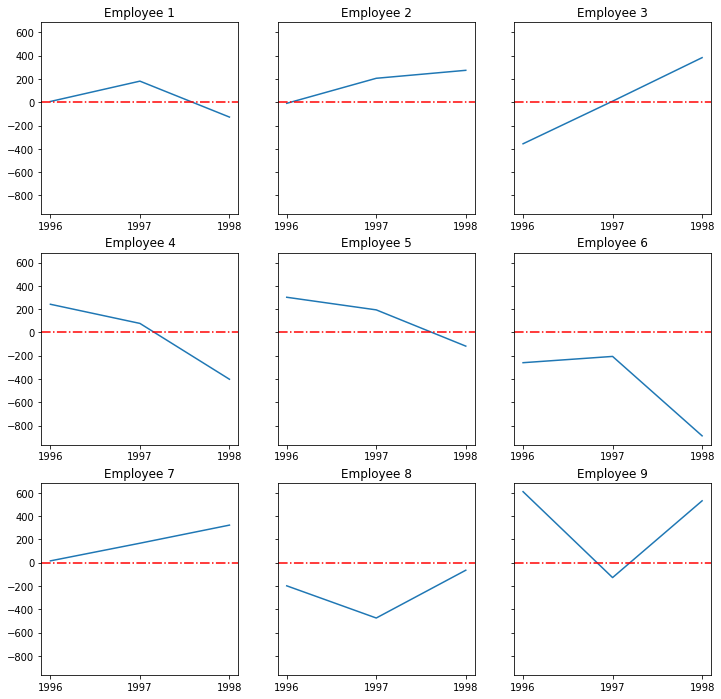

In [98]:
# creating grid of line charts 
fig, axs = plt.subplots(3, 3, sharey = True, figsize = (12, 12)) 

axs[0,0].plot(salesPerYear.loc[1, "revDiff"])
axs[0,0].set_title("Employee 1") 

axs[0,1].plot(salesPerYear.loc[2, "revDiff"]) 
axs[0,1].set_title("Employee 2") 

axs[0,2].plot(salesPerYear.loc[3, "revDiff"]) 
axs[0,2].set_title("Employee 3") 

axs[1,0].plot(salesPerYear.loc[4, "revDiff"]) 
axs[1,0].set_title("Employee 4")  

axs[1,1].plot(salesPerYear.loc[5, "revDiff"]) 
axs[1,1].set_title("Employee 5") 

axs[1,2].plot(salesPerYear.loc[6, "revDiff"]) 
axs[1,2].set_title("Employee 6") 

axs[2,0].plot(salesPerYear.loc[7, "revDiff"]) 
axs[2,0].set_title("Employee 7") 

axs[2,1].plot(salesPerYear.loc[8, "revDiff"]) 
axs[2,1].set_title("Employee 8") 

axs[2,2].plot(salesPerYear.loc[9, "revDiff"]) 
axs[2,2].set_title("Employee 9") 

for ax in axs.flat: 
    ax.axhline(y = 0, color = "red", linestyle = "dashdot")

This helps us visualize how each employee's performance is trending over time, and how their performance compares to overall performances. For instance, we can see that employees 3 and 7 have improved each year, while employees 4 and 5 have gotten worse each year. 

Let's repeat this same exercise, but instead analyzing total revenue per employee per year. (Assume we expect sales revenue to be evenly distributed among the employees. So an employee's expected total sales revenue will be the total for that year divided by 9). 

In [106]:
totRevYear = orders2.groupby("Year").sum()["Revenue"]
totRevYear = pd.DataFrame(totRevYear) 
totRevYear

,Revenue
Year,
1996,208083.97
1997,617085.23
1998,440623.82


In [111]:
# adding yearly values to dataframe 
r1996 = 208083.97/9
r1997 = 617085.23/9
r1998 = 440623.82/9
salesPerYear["exRev"] = np.tile([r1996, r1997, r1998], 9) 
salesPerYear["exRev"] = salesPerYear["exRev"].round(2)

# calculating difference 
salesPerYear["totRevDiff"] = salesPerYear["Revenue"] - salesPerYear["exRev"]
salesPerYear

Freight  UnitPrice  Quantity    Revenue  DiscountAmt  \
EmployeeID Year                                                          
1          1996   5578.78    1691.40      1620   35764.51      3024.49   
           1997  16490.13    3957.08      3877   93148.10      4385.49   
           1998   6049.34    3083.96      2315   63194.98      2626.14   
2          1996   2585.52     822.20      1085   21757.06      1077.64   
           1997  13428.55    3195.24      2604   70444.14      4514.46   
           1998   9910.46    2895.97      2366   74336.56      5619.40   
3          1996   2483.58     812.60       940   18223.96      1007.84   
           1997  24108.09    4568.01      4436  108026.13      3762.47   
           1998   9191.95    3367.81      2476   76562.73      5468.16   
4          1996   6968.06    2340.40      2212   49945.12      3169.68   
           1997  21571.62    6074.42      5273  128809.81     10667.89   
           1998   8721.87    2772.47      2313   54135.94      3459.01   
5          1996   4836.31     701.70       778   18383.92      3581.28   
           1997   4003.83    1136.99      1471   30716.48      1878.57   
           1998   5067.14     908.74       787   19691.89      1315.61   
6          1996   2431.01     778.30       963   16642.60      1088.50   
           1997   6065.90    2148.73      1738   43126.38      2865.63   
           1998   2626.18     907.93       826   14144.16       330.84   
7          1996   1587.75     639.10       485   15232.16      2872.64   
           1997  10138.15    2430.86      2292   60471.19      6217.95   
           1998   9941.77    1647.55      1877   48864.87      7637.18   
8          1996   3313.44    1352.30       923   22240.12       921.28   
           1997   8011.07    2683.46      2843   56032.61      3743.91   
           1998  11979.91    2203.49      2147   48589.54      1773.57   
9          1996   2287.08     272.20       575    9894.52      1471.18   
           1997   2974.73    1420.29       955   26310.39      3267.16   
           1998   4953.88    1687.71      1140   41103.15       917.60   

                 countOrders  revPerOrder  revPerOverall  revDiff     exRev  \
EmployeeID Year                                                               
1          1996           26      1375.56        1368.97     6.59  23120.44   
           1997           55      1693.60        1512.46   181.14  68565.03   
           1998           42      1504.64        1631.94  -127.30  48958.20   
2          1996           16      1359.82        1368.97    -9.15  23120.44   
           1997           41      1718.15        1512.46   205.69  68565.03   
           1998           39      1906.07        1631.94   274.13  48958.20   
3          1996           18      1012.44        1368.97  -356.53  23120.44   
           1997           71      1521.49        1512.46     9.03  68565.03   
           1998           38      2014.81        1631.94   382.87  48958.20   
4          1996           31      1611.13        1368.97   242.16  23120.44   
           1997           81      1590.24        1512.46    77.78  68565.03   
           1998           44      1230.36        1631.94  -401.58  48958.20   
5          1996           11      1671.27        1368.97   302.30  23120.44   
           1997           18      1706.47        1512.46   194.01  68565.03   
           1998           13      1514.76        1631.94  -117.18  48958.20   
6          1996           15      1109.51        1368.97  -259.46  23120.44   
           1997           33      1306.86        1512.46  -205.60  68565.03   
           1998           19       744.43        1631.94  -887.51  48958.20   
7          1996           11      1384.74        1368.97    15.77  23120.44   
           1997           36      1679.76        1512.46   167.30  68565.03   
           1998           25      1954.59        1631.94   322.65  48958.20   
8          1996           19      1170.53        1368.

From these results, it appears that some employees are consistently generating less revenue than expected, while others are consistently generating more than expected. Let's visualize these results now. 

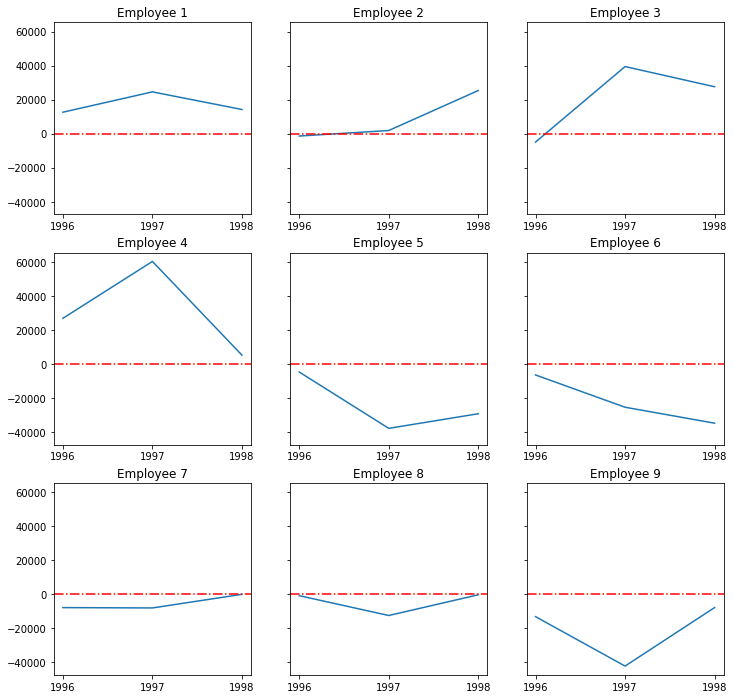

In [112]:
# creating grid of line charts 
fig, axs = plt.subplots(3, 3, sharey = True, figsize = (12, 12)) 

axs[0,0].plot(salesPerYear.loc[1, "totRevDiff"])
axs[0,0].set_title("Employee 1") 

axs[0,1].plot(salesPerYear.loc[2, "totRevDiff"]) 
axs[0,1].set_title("Employee 2") 

axs[0,2].plot(salesPerYear.loc[3, "totRevDiff"]) 
axs[0,2].set_title("Employee 3") 

axs[1,0].plot(salesPerYear.loc[4, "totRevDiff"]) 
axs[1,0].set_title("Employee 4")  

axs[1,1].plot(salesPerYear.loc[5, "totRevDiff"]) 
axs[1,1].set_title("Employee 5") 

axs[1,2].plot(salesPerYear.loc[6, "totRevDiff"]) 
axs[1,2].set_title("Employee 6") 

axs[2,0].plot(salesPerYear.loc[7, "totRevDiff"]) 
axs[2,0].set_title("Employee 7") 

axs[2,1].plot(salesPerYear.loc[8, "totRevDiff"]) 
axs[2,1].set_title("Employee 8") 

axs[2,2].plot(salesPerYear.loc[9, "totRevDiff"]) 
axs[2,2].set_title("Employee 9") 

for ax in axs.flat: 
    ax.axhline(y = 0, color = "red", linestyle = "dashdot")

From this visualization, we can identify that employees 1 and 4 are consistently overperforming, while employees 5, 6, and 9 and consistently underperforming. We can also identify that employee 6 is progressively getting worse over time. 